### 1. Presentación

In [196]:
# Importamos todas las librerias que se necesitan.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms, plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot, grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [197]:
# Creamos el dataframe de Real Estate y lo mostramos
df_RE=pd.read_csv("../data/RealEstate_Sales_2001-2020.csv")
df_RE

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
0,2020348,2020,9/13/2021,Ansonia,230 WAKELEE AVE,150500,325000.0,0.463000,Commercial,Nan,1
1,20002,2020,10/2/2020,Ashford,390 TURNPIKE RD,253000,430000.0,0.588300,Residential,Single Family,0
2,200212,2020,3/9/2021,Avon,5 CHESTNUT DRIVE,130400,179900.0,0.724800,Residential,Condo,1
3,200243,2020,4/13/2021,Avon,111 NORTHINGTON DRIVE,619290,890000.0,0.695800,Residential,Single Family,1
4,200377,2020,7/2/2021,Avon,70 FAR HILLS DRIVE,862330,1447500.0,0.595700,Residential,Single Family,1
...,...,...,...,...,...,...,...,...,...,...,...
997208,190272,2019,6/24/2020,New London,4 BISHOP CT,60410,53100.0,1.137665,Single Family,Single Family,1
997209,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280,76000.0,0.898400,Single Family,Single Family,0
997210,190129,2019,4/27/2020,Windsor Locks,19 HATHAWAY ST,121450,210000.0,0.578300,Single Family,Single Family,1
997211,190504,2019,6/3/2020,Middletown,8 BYSTREK DR,203360,280000.0,0.726300,Single Family,Single Family,1


In [198]:
# Antes de empezar, realizamos una copia de DF y lo guardamos como backup en un DF distinto
df_RE_backup=df_RE.copy()

In [199]:
# Revisamos el DF y vemos que no hay nulos además de los tipos de cada variable
df_RE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997213 non-null  object 
 5   Assessed Value    997213 non-null  int64  
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     997213 non-null  object 
 9   Residential Type  997213 non-null  object 
 10  Years until sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


In [200]:
# Reasignamos la variable Date Recorded a datetime y ordenamos el DF
df_RE["Date Recorded"]=pd.to_datetime(df_RE["Date Recorded"])
df_RE.sort_values(by="Date Recorded",inplace=True)

### 2. Revisión y limpieza

In [201]:
# Buscamos registros duplicados y vemos que no hay:
duplicados=df_RE.duplicated()
df_RE[duplicados]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold


#### Serial Number

In [202]:
# El Serial Number debería ser un indicador único para cada transacción pero vemos que hay muchas repeticiones de algunos de ellos.
df_RE["Serial Number"].value_counts()

Serial Number
10010      172
10018      172
10002      172
10003      171
10029      171
          ... 
1500885      1
1500887      1
1500884      1
1500888      1
208123       1
Name: count, Length: 83537, dtype: int64

In [203]:
# Comprobamos cuántos indicadores repetidos hay y son muchos. Así que investigamos más.
df_RE.loc[df_RE["Serial Number"].duplicated()]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
109930,10002,2001,2001-10-01,New Britain,195 MANSFIELD AVE,85260,137500.0,0.620073,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
96260,10001,2001,2001-10-01,Coventry,144 BUENA VISTA RD,55860,100000.0,0.558600,Nan,Nan,0
91590,10002,2001,2001-10-01,East Windsor,361 RYE ST,70570,150000.0,0.470467,Nan,Nan,0
86330,10005,2001,2001-10-01,Cheshire,81 MAYVIEW AVE,79470,150000.0,0.529800,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
59233,200354,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,200228,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,20712,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,20000043,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


In [204]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (10003)
df_RE.loc[df_RE["Serial Number"]==10003]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
76429,10003,2001,2001-10-01,Avon,26 OAKENGATE LN,287990,455000.0,0.632945,Nan,Nan,0
70789,10003,2001,2001-10-01,Berlin,2528 CHAMBERLAIN HWY,82800,130000.0,0.636923,Nan,Nan,0
122165,10003,2001,2001-10-01,North Haven,90 CULVER LN,118440,211000.0,0.561327,Nan,Nan,0
80091,10003,2001,2001-10-01,Brooklyn,250 HERRICK RD,73670,127900.0,0.575997,Nan,Nan,0
84005,10003,2001,2001-10-01,Burlington,24 DANIEL TRACE,326620,485000.0,0.673443,Nan,Nan,0
...,...,...,...,...,...,...,...,...,...,...,...
546107,10003,2010,2010-11-16,Eastford,ASHFORD RD,55200,40000.0,1.380000,Nan,Nan,0
582996,10003,2010,2010-11-16,Hampton,259 SO BIGELOW RD,302090,355000.0,0.850958,Single Family,Single Family,0
67439,10003,2010,2010-11-30,Hartland,PELL RD,80330,125900.0,0.638046,Nan,Nan,0
590703,10003,2010,2010-12-14,Chaplin,63 CHAPPELL ST,117900,150000.0,0.786000,Single Family,Single Family,0


In [205]:
# Comprobamos que los indicadores repetidos no corresponden con la misma transacción (10003)
df_RE.loc[df_RE["Serial Number"]==2000807]	

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
47544,2000807,2020,2021-01-15,Stamford,93 GLENBROOK ROAD #102,122160,72000000.0,0.0016,Residential,Condo,1
46420,2000807,2020,2021-09-30,Naugatuck,226 MAPLE ST,211660,370000.0,0.5720,Apartments,Nan,1


In [206]:
# Dado que la columna Serial Number no aporta información verídica, la eliminamos.
df_RE.drop("Serial Number",axis=1,inplace=True)
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5
...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1


#### List Year

In [207]:
# Revisamos los valores de la columna List Year y a priori no parece haber nada raro.
df_RE["List Year"].value_counts()

List Year
2004    84056
2020    66592
2003    64239
2005    61602
2002    59682
2001    59584
2019    58954
2018    50709
2016    49773
2014    49563
2006    48785
2015    46651
2017    45691
2009    42508
2013    39943
2012    35973
2007    35617
2010    33491
2008    32735
2011    31065
Name: count, dtype: int64

#### Date Recorded y Recorded Year

In [208]:
# A partir de la columna Date Recorded vamos a crear una nueva columna extrayendo solo el año de dicha fecha.
df_RE["Recorded Year"] = df_RE["Date Recorded"].dt.year
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
857911,2017,1999-04-05,New London,184 PEQUOT AVE 309,46690,95000.0,0.491400,Condo,Condo,-18,1999
878446,2017,2001-08-01,Shelton,19 BLACKBERRY LA,390810,635000.0,0.615449,Single Family,Single Family,-16,2001
882211,2017,2001-08-23,Shelton,12 BOYSENBERRY LA,427910,558000.0,0.766864,Single Family,Single Family,-16,2001
389700,2006,2001-09-04,Newington,110 MOYLAN CT,64750,88000.0,0.735795,Condo,Condo,-5,2001
430204,2006,2001-09-05,Newington,48 EVERGREEN RD,166110,256000.0,0.648867,Single Family,Single Family,-5,2001
...,...,...,...,...,...,...,...,...,...,...,...
59233,2020,2021-09-30,Windham,148 CHESTNUT ST,84380,205000.0,0.411600,Residential,Single Family,1,2021
12356,2020,2021-09-30,Essex,17 MAIN ST,223600,255000.0,0.876800,Residential,Single Family,1,2021
38896,2020,2021-09-30,Southbury,6 HERITAGE CREST,158280,316000.0,0.500800,Residential,Condo,1,2021
5020,2020,2021-09-30,Hampton,53 WEST OLD RT 6,209720,393000.0,0.533600,Residential,Single Family,1,2021


In [210]:
# Analizando los valores de la nueva columna vemos que hay años anteriores y posteriores al periodo a analizar (2001-2020).
# El año 2001 se registra una cantidad extrañamente inferior a los años siguientes por lo que se prescinde también de los registros de ese año.
# Además hay un registro de 1999 cuando los de la columna List Year empiezan posteriormente. Resulta extraño y lo analizaremos con Years until sold.
df_RE["Recorded Year"].value_counts()

Recorded Year
2005    79566
2004    73943
2020    62534
2002    60207
2006    57250
2003    56319
2019    52622
2015    48894
2017    48493
2021    48441
2016    47611
2018    47165
2007    46138
2014    41941
2010    39128
2013    37513
2009    36305
2008    34195
2012    32568
2011    32088
2001    14291
1999        1
Name: count, dtype: int64

In [278]:
# Eliminamos los registros de las transacciones realizadas anterior o posteriormente a 2001 y 2020.
df_RE.drop(df_RE[df_RE["Recorded Year"] == 1999].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2001].index, inplace=True)
df_RE.drop(df_RE[df_RE["Recorded Year"] == 2021].index, inplace=True)

#### Years until sold

In [212]:
# Nos centramos en la columna Years until sold y buscamos los registros cuya fecha de venta es anterior a la fecha de "publicación".
df_RE[df_RE["Years until sold"]<0]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
407732,2006,2003-07-17,Naugatuck,80 GORMAN ST,84200,158900.0,0.529893,Single Family,Single Family,-3,2003
388498,2006,2004-02-26,Sharon,DOUGLAS RD,3600,5020.0,0.717131,Nan,Nan,-2,2004
414000,2006,2004-06-05,Bristol,225 TYLER WAY,147320,329900.0,0.446560,Single Family,Single Family,-2,2004
443550,2006,2004-07-27,South Windsor,305 MILL POND DR,113580,210000.0,0.540857,Condo,Condo,-2,2004
419243,2006,2004-07-31,Newington,131 STAGE COACH LN,246120,420000.0,0.586000,Single Family,Single Family,-2,2004
443976,2006,2004-08-02,Stratford,125 WARNER HL RD 27,92750,179000.0,0.518156,Condo,Condo,-2,2004
451304,2006,2004-09-12,Stratford,243 WEBER AVENUE,420,287500.0,0.001461,Nan,Nan,-2,2004
424369,2006,2004-09-24,South Windsor,2606 MILL POND DR,123520,243900.0,0.506437,Condo,Condo,-2,2004
479961,2007,2004-11-02,Westport,6 SPRUCEWOOD LANE,869600,1200000.0,0.724667,Single Family,Single Family,-3,2004
478225,2007,2005-02-05,Meriden,46 ORIENT ST,155340,264000.0,0.588409,Two Family,Two Family,-2,2005


In [213]:
# Dado que no hay manera de saber la fecha correcta (siendo un dato importante para el estudio) y el peso de los registros no es significativo, decidimos borrar esos registros.
df_RE.drop(df_RE[df_RE["Years until sold"]<0].index,inplace=True)

In [214]:
# Comprobamos que entre la columna de List Year y la nueva columna Recorded Year no se da este error.
df_RE.loc[df_RE["List Year"]>df_RE["Recorded Year"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year


In [215]:
# Creamos una nueva columna con los años entre el List Year y el Recorded Year para comprobar si hay más incongruencias con la columna Years until sold.
df_RE["Years for sale"]=df_RE["Recorded Year"]-df_RE["List Year"]

In [216]:
# Ambas columnas son iguales por lo que eliminamos la nueva varibale creada.
df_RE[df_RE["Years for sale"]!=df_RE["Years until sold"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Years for sale


In [217]:
# Eliminamos la nueva columna creada.
df_RE.drop("Years for sale", axis=1, inplace=True)

#### Town

In [218]:
#Listamos todos los towns del dataset. Vemos que hay alguno/s con valor Unknown.
towns=df_RE["Town"].unique()
towns

array(['New Britain', 'Norwich', 'Roxbury', 'East Haven', 'Bristol',
       'Woodbury', 'Stratford', 'Newtown', 'Vernon', 'Hamden',
       'West Hartford', 'Westport', 'Windsor Locks', 'Watertown',
       'Stonington', 'Wethersfield', 'Torrington', 'Manchester',
       'West Haven', 'Milford', 'Plainville', 'Bridgeport', 'Rocky Hill',
       'East Granby', 'Southbury', 'Orange', 'Preston', 'Middletown',
       'Danbury', 'Avon', 'Ridgefield', 'Plainfield', 'Branford',
       'Farmington', 'East Windsor', 'Redding', 'Suffield', 'Newington',
       'Eastford', 'Berlin', 'Ansonia', 'Waterford', 'Hartford',
       'New London', 'Willington', 'Granby', 'Clinton', 'Hartland',
       'Wilton', 'Lyme', 'Bridgewater', 'East Hampton', 'Simsbury',
       'Litchfield', 'Chester', 'Stamford', 'Naugatuck', 'Burlington',
       'Killingly', 'Oxford', 'Cromwell', 'Glastonbury', 'Thompson',
       'Sterling', 'Bethlehem', 'Putnam', 'Norfolk', 'Madison', 'Windsor',
       'Ellington', 'Durham', 'Norwalk

In [219]:
# Buscamos los registros cuyo Town es desconocido y así podemos corregirlo (por los valores de town de la misma Address y lo podemos ver también en Internet)
df_RE.loc[df_RE["Town"]=="***Unknown***"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [220]:
#Vemos que con la misma dirección hay tres registros que hacen referencia a la misma transacción ya que tienen la misma fecha de compra y corresponden a una casa individual.
df_RE.loc[df_RE["Address"]=="18 MATHIEU LANE"]

,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
479214,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,50000.0,1.330800,Nan,Nan,0,2007
444657,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007
444846,2007,2007-12-18,East Hampton,18 MATHIEU LANE,66540,282450.0,0.235582,Single Family,Single Family,0,2007


In [221]:
# Al no poder determinar cual es la correcta, las eliminamos.
df_RE.drop(df_RE[df_RE["Address"] == "18 MATHIEU LANE"].index, inplace=True)

#### Address

In [222]:
# La dejamos para más tarde

#### Assessed Value y Sale Amount 

In [223]:
# Cambiamos el nombre de la columna Sale Amount a Price
df_RE.rename(columns={"Sale Amount":"Price"},inplace=True)

In [224]:
# Las valoraciones son variables enteras mientras que el precio de compra no.
df_RE["Assessed Value"].dtype

dtype('int64')

In [225]:
df_RE["Price"].dtype

dtype('float64')

In [226]:
# El valor mínimo de Assessed Value y Price es 0 por lo que se decide eliminar dichos registros.
df_RE["Assessed Value"].min()

0

In [227]:
df_RE[df_RE["Assessed Value"]==0]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
100373,2001,2002-01-02,Stratford,4 CANAAN CT U15,0,38500.0,0.0,Nan,Nan,1,2002
118140,2001,2002-01-02,Thompson,LAKEVIEW ST,0,5000.0,0.0,Nan,Nan,1,2002
98572,2001,2002-01-07,Windsor Locks,12 GLENBROOK DR,0,168825.0,0.0,Nan,Nan,1,2002
112013,2001,2002-01-07,Sterling,1255 PLAINFIELD PIKE,0,12000.0,0.0,Nan,Nan,1,2002
81743,2001,2002-01-08,Eastford,COUNTY RD,0,32500.0,0.0,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
7027,2020,2020-12-23,Greenwich,125 FIELD POINT ROAD B6,0,3750000.0,0.0,Residential,Condo,0,2020
55567,2020,2020-12-29,Stratford,84 CANAAN STREET APT 25,0,28500.0,0.0,Apartments,Nan,0,2020
22235,2020,2020-12-30,Greenwich,125 FIELD POINT ROAD B4,0,3150000.0,0.0,Residential,Condo,0,2020
9266,2020,2020-12-31,Greenwich,0 LAFRENTZ ROAD,0,1700000.0,0.0,Vacant Land,Nan,0,2020


In [228]:
df_RE.drop(df_RE[df_RE["Assessed Value"]==0].index, inplace=True)

In [229]:
df_RE["Price"].min()

0.0

In [230]:
df_RE.loc[df_RE["Price"]==0]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
116770,2001,2002-01-02,Stratford,42 SHIRLEY DR,86050,0.0,0.0,Nan,Nan,1,2002
115067,2001,2002-01-02,Stratford,42 SHIRLEY DR,86050,0.0,0.0,Nan,Nan,1,2002
110282,2001,2002-01-02,Stratford,5825 MAIN ST,186870,0.0,0.0,Nan,Nan,1,2002
107907,2001,2002-01-03,Stratford,407 LIGHT ST,80730,0.0,0.0,Nan,Nan,1,2002
86,2001,2002-01-03,Bethany,9 SIMPSON CT,96590,0.0,0.0,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
893688,2018,2018-11-09,Berlin,1275 WORTHINGTON RIDGE,112000,0.0,0.0,Single Family,Single Family,0,2018
896571,2018,2018-11-15,Berlin,127 WETHERSFIELD ROAD,157100,0.0,0.0,Single Family,Single Family,0,2018
890919,2018,2018-11-19,Berlin,218 BROOKE MEADOW ROAD,231000,0.0,0.0,Single Family,Single Family,0,2018
894841,2018,2018-11-19,Berlin,218 BROOKE MEADOW ROAD,231000,0.0,0.0,Single Family,Single Family,0,2018


In [231]:
df_RE.drop(df_RE[df_RE["Price"]==0].index,inplace=True)

In [232]:
df_RE.loc[df_RE["Assessed Value"]>df_RE["Price"]]

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year
101765,2001,2002-01-02,Newtown,38 GRAND PL,165290,59342.0,2.785380,Nan,Nan,1,2002
124384,2001,2002-01-02,Torrington,606 PROSPECT ST,41100,32000.0,1.284375,Nan,Nan,1,2002
101918,2001,2002-01-02,New Britain,2189 CORBIN AVE,79880,63000.0,1.267937,Nan,Nan,1,2002
97007,2001,2002-01-02,Orange,149 PORTER LN,154600,129500.0,1.193822,Nan,Nan,1,2002
124536,2001,2002-01-02,Preston,76 BENJAMIN RD,23300,10000.0,2.330000,Nan,Nan,1,2002
...,...,...,...,...,...,...,...,...,...,...,...
23745,2020,2020-12-31,Hampton,67 PARKER RD,129530,75000.0,1.727000,Residential,Single Family,0,2020
46473,2020,2020-12-31,Milford,19 LIBERTY ST,124400,112000.0,1.110714,Residential,Single Family,0,2020
16967,2020,2020-12-31,Greenwich,50 LAFRENTZ ROAD,4335100,2700000.0,1.605500,Residential,Single Family,0,2020
38773,2020,2020-12-31,New London,45 SPRING ST,90160,53000.0,1.701100,Residential,Single Family,0,2020


In [233]:
# Creamos una nueva variable binaria, Overpriced" que indica si el precio es superior a la valoración.
df_RE["Overpriced"] = ["Yes" if assess < price else "No" for assess, price in zip(df_RE["Assessed Value"], df_RE["Price"])]

#### Sales Ratio

In [234]:
# Nos determina el ratio entre el precio de venta y la valoración del inmueble.
df_RE["Sales Ratio"]=df_RE["Price"]/df_RE["Assessed Value"]
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced
102497,2001,2002-01-01,New Britain,84 PIERREMOUNT AVE,60870,119900.0,1.969772,Nan,Nan,1,2002,Yes
108921,2001,2002-01-01,Norwich,348 BOSWELL AVE,61900,135000.0,2.180937,Nan,Nan,1,2002,Yes
97780,2001,2002-01-01,Roxbury,184 BACON RD,48660,126500.0,2.599671,Nan,Nan,1,2002,Yes
95898,2001,2002-01-01,East Haven,47 UNION AVE,62400,178000.0,2.852564,Nan,Nan,1,2002,Yes
86543,2001,2002-01-01,Bristol,52 SONSTROM RD,92440,140000.0,1.514496,Nan,Nan,1,2002,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
7008,2020,2020-12-31,Griswold,2 MECHANIC ST,27650,10000.0,0.361664,Vacant Land,Nan,0,2020,No
17958,2020,2020-12-31,Goshen,127 EAST HYERDALE DRIVE,337130,520000.0,1.542432,Residential,Single Family,0,2020,Yes
56995,2020,2020-12-31,Wethersfield,33 TWO STONE DR,143180,150000.0,1.047632,Residential,Single Family,0,2020,Yes
36723,2020,2020-12-31,Stonington,15 SHERWOOD DR,156600,226000.0,1.443167,Residential,Single Family,0,2020,Yes


#### Property Type y Residential Type

In [235]:
# Analizando los valores de tipología de propiedad vemos que hay clases que seguramente se pueden categorizar dentro de otras: apartments, condos, single family, 2 family, 3 family and 4 family parecen propiedades residencial
df_RE["Property Type"].value_counts(True)

Property Type
Single Family     0.432537
Nan               0.390953
Condo             0.112582
Two Family        0.028477
Residential       0.018082
Three Family      0.013583
Four Family       0.002320
Vacant Land       0.000837
Commercial        0.000486
Apartments        0.000084
Industrial        0.000058
Public Utility    0.000001
Name: proportion, dtype: float64

In [236]:
# Analizando los valores de la tipología de viviendas residenciales vemos que efectivamente podrían incluirse dentro de esa categoría.
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Apartments      Nan                     78
Commercial      Nan                    450
Condo           Condo               104298
Four Family     Four Family           2149
Industrial      Nan                     54
Nan             Nan                 362187
Public Utility  Nan                      1
Residential     Single Family        12428
                Condo                 3107
                Two Family             787
                Three Family           370
                Four Family             60
Single Family   Single Family       400711
Three Family    Three Family         12584
Two Family      Two Family           26382
Vacant Land     Nan                    775
Name: count, dtype: int64

In [237]:
# Los apartamentos vamos a asignarlos a la tipología residencial.
df_RE.loc[df_RE["Property Type"]=="Apartments","Residential Type"]="Apartments"

In [238]:
# Categorizamos como propiedad residencial todos los que lo son.
df_RE.loc[df_RE["Residential Type"]=="Apartments","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Condo","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Single Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Two Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Three Family","Property Type"]="Residential"
df_RE.loc[df_RE["Residential Type"]=="Four Family","Property Type"]="Residential"

In [239]:
# Comprobamos la categorización
df_RE.groupby("Property Type")["Residential Type"].value_counts()

Property Type   Residential Type
Commercial      Nan                    450
Industrial      Nan                     54
Nan             Nan                 362187
Public Utility  Nan                      1
Residential     Single Family       413139
                Condo               107405
                Two Family           27169
                Three Family         12954
                Four Family           2209
                Apartments              78
Vacant Land     Nan                    775
Name: count, dtype: int64

In [240]:
# Vemos que hay tipos de propiedad muy marginales que se pueden unificar en una categoría Others; y que hay una gran cantidad, el 40% del DF, sin detallar el tipo de propiedad.
df_RE["Property Type"].value_counts(True)

Property Type
Residential       0.607665
Nan               0.390953
Vacant Land       0.000837
Commercial        0.000486
Industrial        0.000058
Public Utility    0.000001
Name: proportion, dtype: float64

In [241]:
# Unificamos las tipologías de propiedad marginales.
df_RE.loc[df_RE["Property Type"]=="Vacant Land","Property Type"]="Others"
df_RE.loc[df_RE["Property Type"]=="Commercial","Property Type"]="Others"
df_RE.loc[df_RE["Property Type"]=="Industrial","Property Type"]="Others"
df_RE.loc[df_RE["Property Type"]=="Public Utility","Property Type"]="Others"

In [242]:
# Creamos un DF con las propiedades sin categorizar y vemos que del 2001 al 2006 hay una gran catidad de inmuebles sin categoría.
df_RE_Nan=df_RE.loc[df_RE["Property Type"]=="Nan"].copy()

In [243]:
df_RE_Nan["Recorded Year"].value_counts()

Recorded Year
2005    77903
2004    72727
2002    59397
2003    55442
2006    45371
2007     5022
2019     4247
2018     4056
2015     3934
2016     3918
2017     3873
2014     3813
2010     3386
2008     3364
2020     3363
2013     3268
2011     3155
2012     3124
2009     2824
Name: count, dtype: int64

In [244]:
# Creamos un DF con las propiedades categorizadas y vemos que del 2001 al 2005 no hay ningún inmueble y en 2006 hay aprox. 11K vs. 2007 41K (aprox.) sin categoría.
df_RE_NoNan=df_RE.loc[df_RE["Property Type"]!="Nan"].copy()

In [245]:
df_RE_NoNan["Recorded Year"].value_counts()

Recorded Year
2020    59026
2019    48236
2015    44848
2017    44518
2016    43559
2018    42941
2007    40502
2014    38037
2010    35588
2013    34159
2009    33320
2008    30480
2012    29367
2011    28777
2006    10876
Name: count, dtype: int64

In [246]:
# Esta situación nos lleva a pensar que en 2006 se empezaron a categorizar los inmuebles objeto de transacción pero que hasta el momento su categoría no venía informada. ¿Es un tema del DF o a nivel nacional no se tiene ese dato?
# Dada la falta de información en años previos al 2006 no podemos prescindir de ninguna categoría.

In [247]:
# Añadimos una columna que permita saber si la transacción as anterior a 2007 o no. Será una variable Binaria.
df_RE["Before 2007"] = ["Yes" if year < 2007 else "No" for year in df_RE["Recorded Year"]]
df_RE

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007
102497,2001,2002-01-01,New Britain,84 PIERREMOUNT AVE,60870,119900.0,1.969772,Nan,Nan,1,2002,Yes,Yes
108921,2001,2002-01-01,Norwich,348 BOSWELL AVE,61900,135000.0,2.180937,Nan,Nan,1,2002,Yes,Yes
97780,2001,2002-01-01,Roxbury,184 BACON RD,48660,126500.0,2.599671,Nan,Nan,1,2002,Yes,Yes
95898,2001,2002-01-01,East Haven,47 UNION AVE,62400,178000.0,2.852564,Nan,Nan,1,2002,Yes,Yes
86543,2001,2002-01-01,Bristol,52 SONSTROM RD,92440,140000.0,1.514496,Nan,Nan,1,2002,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7008,2020,2020-12-31,Griswold,2 MECHANIC ST,27650,10000.0,0.361664,Others,Nan,0,2020,No,No
17958,2020,2020-12-31,Goshen,127 EAST HYERDALE DRIVE,337130,520000.0,1.542432,Residential,Single Family,0,2020,Yes,No
56995,2020,2020-12-31,Wethersfield,33 TWO STONE DR,143180,150000.0,1.047632,Residential,Single Family,0,2020,Yes,No
36723,2020,2020-12-31,Stonington,15 SHERWOOD DR,156600,226000.0,1.443167,Residential,Single Family,0,2020,Yes,No


#### Address

In [248]:
# Buscamos registros con la misma fecha de venta + town + address + precio de venta para verificar duplicados y quedarnos solo con el primer registro.
duplicados_cuatro_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address", "Price"], keep="first")]
duplicados_cuatro_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007
113793,2001,2002-01-02,Orange,149 PORTER LN,154600,129500.0,0.837646,Nan,Nan,1,2002,No,Yes
102533,2001,2002-01-02,Newtown,19A GEORGES HL RD,190320,20000.0,0.105086,Nan,Nan,1,2002,No,Yes
111837,2001,2002-01-02,Newtown,19A GEORGES HL RD,190320,20000.0,0.105086,Nan,Nan,1,2002,No,Yes
94391,2001,2002-01-03,Guilford,385 THREE MILE CRSE,166460,342000.0,2.054548,Nan,Nan,1,2002,Yes,Yes
80559,2001,2002-01-03,Hartford,16 HUMPHREY ST,50960,60000.0,1.177394,Nan,Nan,1,2002,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36496,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Residential,Single Family,0,2020,No,No
48665,2020,2020-12-24,Newtown,155 & 141 GREAT QUARTER ROAD,250180,91750.0,0.366736,Residential,Single Family,0,2020,No,No
55997,2020,2020-12-28,Westbrook,310 GROVE BEACH RD N,317800,225000.0,0.707992,Others,Nan,0,2020,No,No
52184,2020,2020-12-30,Windsor Locks,2 JACKSON ST,112350,33000.0,0.293725,Residential,Single Family,0,2020,No,No


In [249]:
df_RE.drop(duplicados_cuatro_columnas.index, inplace=True)

In [250]:
# Buscamos registros con la misma fecha de venta + town + address para verificar duplicados y eiminarlos al no poder determinar el precio de venta correcto.
duplicados_tres_columnas = df_RE[df_RE.duplicated(subset=["Date Recorded", "Town", "Address"], keep=False)]
duplicados_tres_columnas

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007
112305,2001,2002-01-02,Plainville,STILLWELL DR,28980,20000.0,0.690131,Nan,Nan,1,2002,No,Yes
80798,2001,2002-01-02,Burlington,7 STANWICH LN,48650,100000.0,2.055498,Nan,Nan,1,2002,Yes,Yes
77776,2001,2002-01-02,Burlington,7 STANWICH LN,48650,7314.0,0.150339,Nan,Nan,1,2002,No,Yes
114709,2001,2002-01-02,Plainville,STILLWELL DR,26985,280000.0,10.376135,Nan,Nan,1,2002,Yes,Yes
104489,2001,2002-01-04,Watertown,106 AUGUSTA ST,85190,32874.0,0.385890,Nan,Nan,1,2002,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13383,2020,2020-12-30,Bristol,41 BETHEL ST,111860,21667.0,0.193697,Residential,Single Family,0,2020,No,No
50030,2020,2020-12-30,New Haven,277 FORBES AV,117670,32500.0,0.276196,Residential,Two Family,0,2020,No,No
42812,2020,2020-12-30,New Haven,277 FORBES AV,117670,97500.0,0.828588,Residential,Two Family,0,2020,No,No
8089,2020,2020-12-30,Bristol,41 BETHEL ST,111860,108333.0,0.968470,Residential,Single Family,0,2020,No,No


In [251]:
df_RE.drop(duplicados_tres_columnas.index, inplace=True)

In [252]:
# Tras eliminar los registros duplicados, la cardinalidad de la dirección es de casi un 73% lo que tiene sentido contando que el DF abarca 20 años.
df_RE["Address"].nunique()/len(df_RE)

0.7405089419156297

In [253]:
len(df_RE)

905958

## Fusionado de tablas (tipo interés / inflación / desempleo)

In [254]:
df_Rates=pd.read_excel("../data/Rates_2001-2021.xlsx")
df_Rates

,Date,Interest Rate,Inflation,Unemployment
0,2001-01-01,0.065,0.028262,0.04730
1,2001-01-02,0.065,0.028262,0.04730
2,2001-01-03,0.060,0.028262,0.04730
3,2001-01-04,0.060,0.028262,0.04730
4,2001-01-05,0.060,0.028262,0.04730
...,...,...,...,...
7666,2021-12-28,0.000,0.046979,0.05350
7667,2021-12-29,0.000,0.046979,0.05350
7668,2021-12-30,0.000,0.046979,0.05350
7669,2021-12-31,0.000,0.046979,0.05350


In [255]:
df_total=pd.merge(df_RE,df_Rates,how="left", left_on="Date Recorded", right_on="Date")

In [256]:
df_total

,List Year,Date Recorded,Town,Address,Assessed Value,Price,Sales Ratio,Property Type,Residential Type,Years until sold,Recorded Year,Overpriced,Before 2007,Date,Interest Rate,Inflation,Unemployment
0,2001,2002-01-01,New Britain,84 PIERREMOUNT AVE,60870,119900.0,1.969772,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
1,2001,2002-01-01,Norwich,348 BOSWELL AVE,61900,135000.0,2.180937,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
2,2001,2002-01-01,Roxbury,184 BACON RD,48660,126500.0,2.599671,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
3,2001,2002-01-01,East Haven,47 UNION AVE,62400,178000.0,2.852564,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
4,2001,2002-01-01,Bristol,52 SONSTROM RD,92440,140000.0,1.514496,Nan,Nan,1,2002,Yes,Yes,2002-01-01,0.0175,0.015860,0.0578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905953,2020,2020-12-31,Griswold,2 MECHANIC ST,27650,10000.0,0.361664,Others,Nan,0,2020,No,No,2020-12-31,0.0000,0.012336,0.0805
905954,2020,2020-12-31,Goshen,127 EAST HYERDALE DRIVE,337130,520000.0,1.542432,Residential,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805
905955,2020,2020-12-31,Wethersfield,33 TWO STONE DR,143180,150000.0,1.047632,Residential,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805
905956,2020,2020-12-31,Stonington,15 SHERWOOD DR,156600,226000.0,1.443167,Residential,Single Family,0,2020,Yes,No,2020-12-31,0.0000,0.012336,0.0805


| Columna          | Descripción |
| ---------------- | ----------- |
| List Year        | Año de publicación |
| Date Redorded    | Fecha de venta |
| Town             | Población |
| Address          | Dirección |
| Assesssed value  | Valoración |
| Price            | Precio de venta |
| Sales ratio      | Precio venta/Valoración |
| Property Type    | Tipo de propiedad |
| Residential Type | Tipo de propiedad (sólo residenciales) |
| Years until sold | Años transcurridos entre publicación y venta |
| Recorded year    | Año de venta |
| Before 2007      | Indica si la transacción se realiza antes del 2007  |
| Overpriced       | Indica si el precio es superior a la valoración  |
| Interest Rate    | Interés marcado por la Reserva Federal |
| Inflation        | Inflación respecto al año anterior  |
| Unemployment     | Población en paro respecto a la población en edad de trabajar  |

In [257]:
def card_tipo(df,umbral_categoria = 10, umbral_continua = 30):
    # Primera parte: Preparo el dataset con cardinalidades, % variación cardinalidad, y tipos
    df_temp = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]) # Cardinaliad y porcentaje de variación de cardinalidad
    df_temp = df_temp.T # Como nos da los valores de las columnas en columnas, y quiero que estas sean filas, la traspongo
    df_temp = df_temp.rename(columns = {0: "Card", 1: "%_Card", 2: "Tipo"}) # Cambio el nombre de la transposición anterior para que tengan más sentido, y uso asignación en vez de inplace = True (esto es arbitrario para el tamaño de este dataset)

    # Corrección para cuando solo tengo un valor
    df_temp.loc[df_temp.Card == 1, "%_Card"] = 0.00

    # Creo la columna de sugerenica de tipo de variable, empiezo considerando todas categóricas pero podría haber empezado por cualquiera, siempre que adapte los filtros siguientes de forma correspondiente
    df_temp["tipo_sugerido"] = "Categorica"
    df_temp.loc[df_temp["Card"] == 2, "tipo_sugerido"] = "Binaria"
    df_temp.loc[df_temp["Card"] > umbral_categoria, "tipo_sugerido"] = "Numerica discreta"
    df_temp.loc[df_temp["%_Card"] > umbral_continua, "tipo_sugerido"] = "Numerica continua"
    # Ojo los filtros aplicados cumplen con el enunciado pero no siguen su orden y planteamiento

    return df_temp

In [258]:
card_tipo(df_total)

,Card,%_Card,Tipo,tipo_sugerido
List Year,20,0.002208,int64,Numerica discreta
Date Recorded,6057,0.668574,datetime64[ns],Numerica discreta
Town,169,0.018654,object,Numerica discreta
Address,670870,74.050894,object,Numerica continua
Assessed Value,88003,9.713806,int64,Numerica discreta
Price,51481,5.682493,float64,Numerica discreta
Sales Ratio,600051,66.233865,float64,Numerica continua
Property Type,3,0.000331,object,Categorica
Residential Type,7,0.000773,object,Categorica
Years until sold,5,0.000552,int64,Categorica


In [259]:
categoricas = ["Property Type","Residential Type"]
numericas = ["List Year","Price","Sales Ratio","Recorded Year","Tipo de interés","Inflación","Desempleo"]

## Análisis

#### Tipo de propiedad

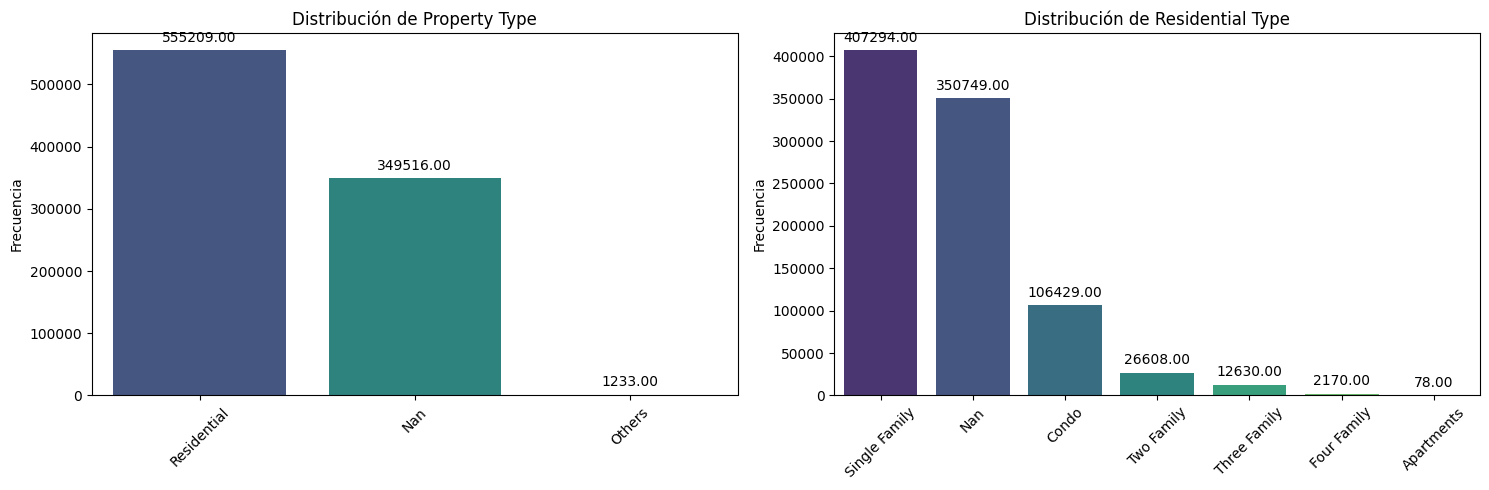

In [260]:
# El 60% de las transacciones corresponden a inmuebles residenciales, rozando las 555.000 ventas.
# Especialmente significativas son las viviendas unifamiliares que representan el 44% del total de transacciones, ascendiendo a un total de 407.294.
# Es importante destacar que del 39% de las transacciones no se conoce el tipo de propiedad objeto de las mismas.  
pinta_distribucion_categoricas(df_total, categoricas, mostrar_valores= True)

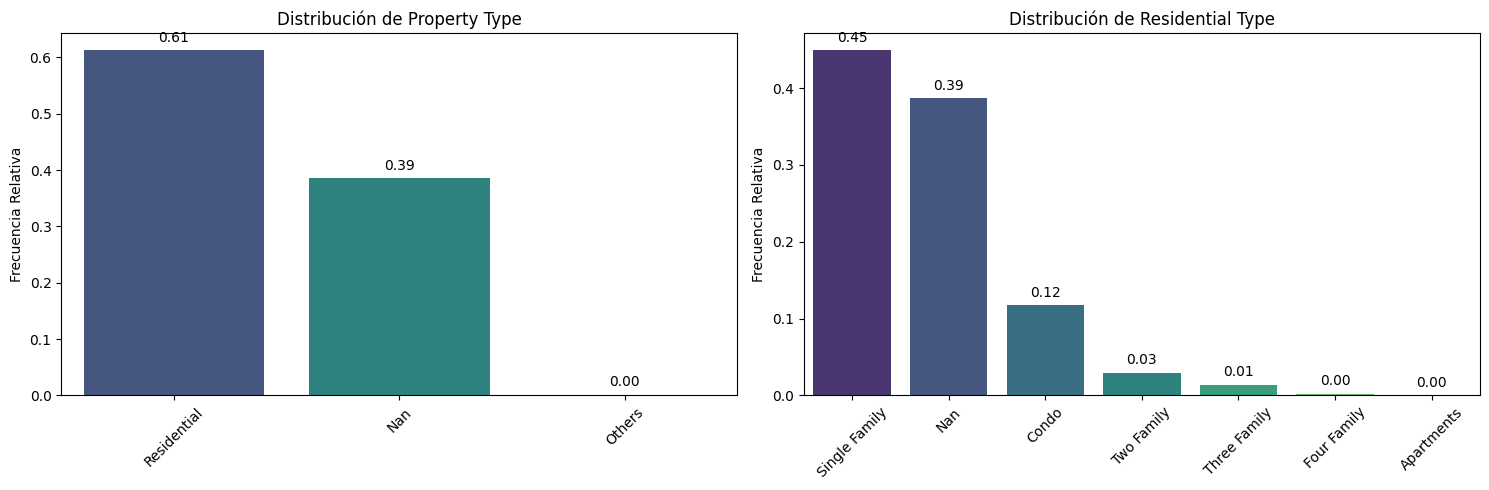

In [261]:
pinta_distribucion_categoricas(df_total, categoricas, mostrar_valores= True, relativa = True)

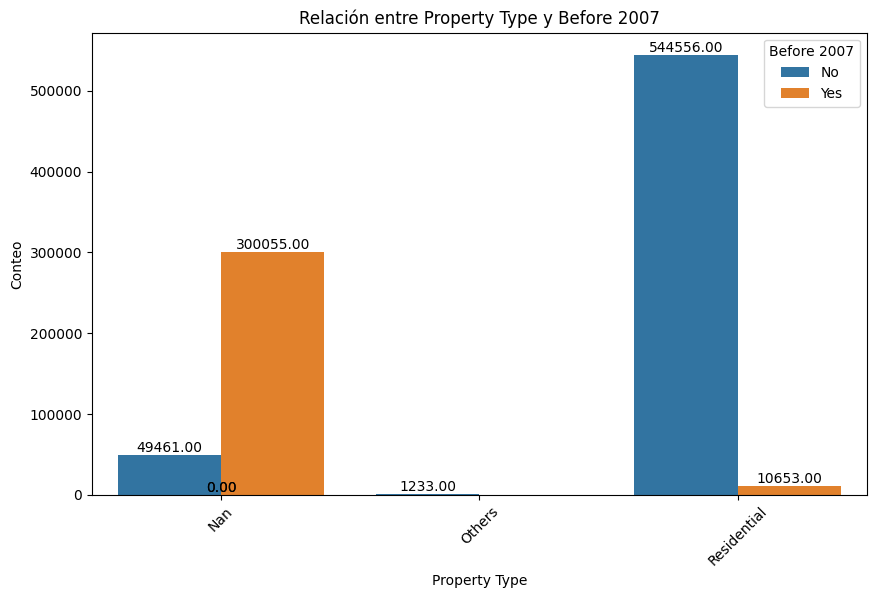

In [262]:
# El 86% de las transacciones no catalogadas correponden al periodo anterior a 2007.
# El 98% de las transacciones de propiedades residenciales se realizaron a partir de 2007.  
plot_categorical_relationship_fin(df_total, "Property Type","Before 2007", show_values= True)

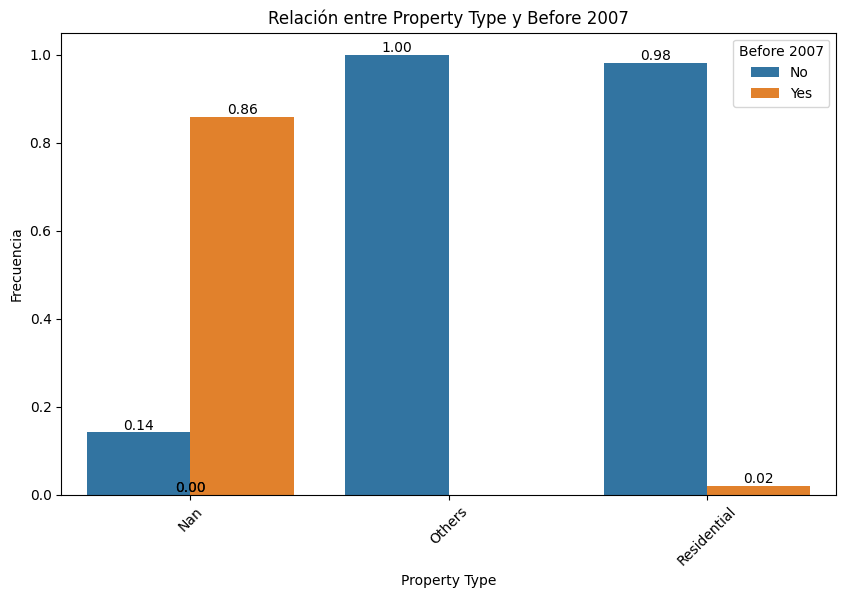

In [263]:
plot_categorical_relationship_fin(df_total, "Property Type","Before 2007", show_values= True, relative_freq= True)

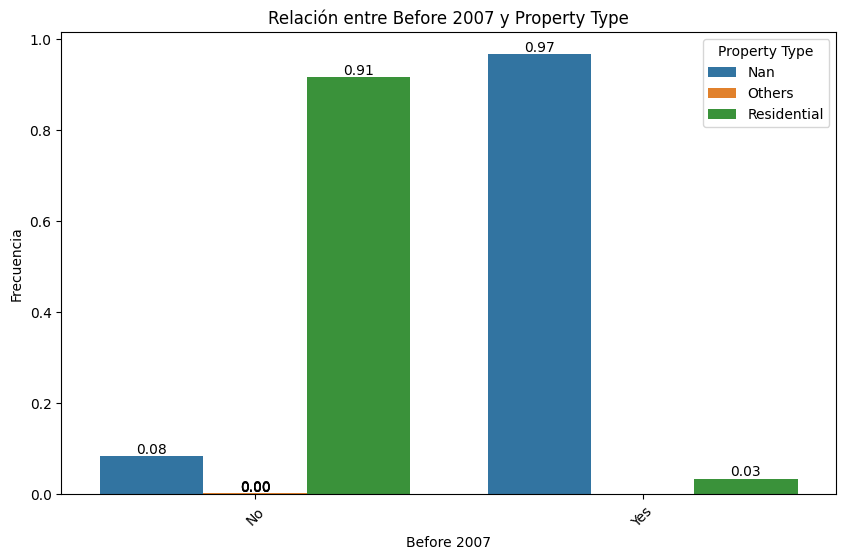

In [264]:
# EL 97% de las transacciones previas a 2007 no están gategorizadas mientras que el 91% de las transacciones entre 2007-2020 fueron de propiedades residenciales.
plot_categorical_relationship_fin(df_total, "Before 2007","Property Type", show_values= True, relative_freq= True)

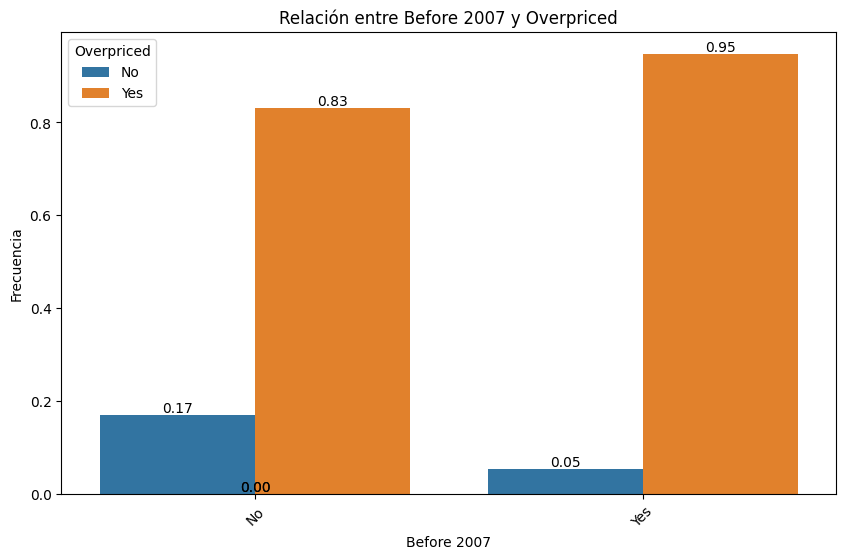

In [265]:
# De las transacciones previas a 2007, el 95% se han pagado por encima de su valoración.
# Ese porcentaje cae al 83% entre las transacciones realizadas entre 2007 y 2020.
plot_categorical_relationship_fin(df_total, "Before 2007","Overpriced", show_values= True, relative_freq= True)

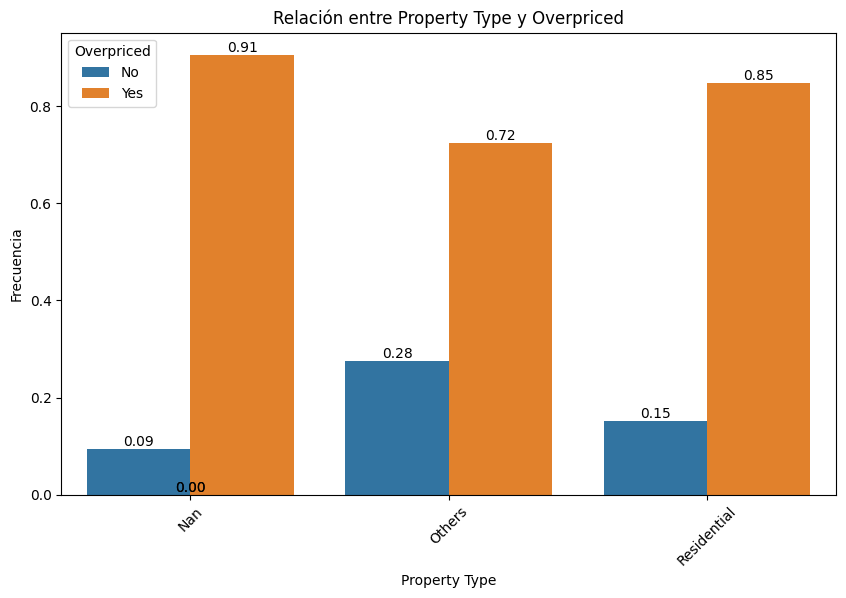

In [266]:
# Por tipo de propiedad, el 85% de las residencias se han pagado por encima de su valoración mientras que en el grupo Others decae al 72%.
plot_categorical_relationship_fin(df_total, "Property Type","Overpriced", show_values= True, relative_freq= True)

In [267]:
df_total[["Recorded Year","Price"]].describe()

,Recorded Year,Price
count,905958.000000,9.059580e+05
mean,2010.662161,3.820748e+05
std,5.890548,1.814713e+06
min,2002.000000,1.000000e+00
25%,2005.000000,1.415000e+05
50%,2010.000000,2.250000e+05
75%,2016.000000,3.600000e+05
max,2020.000000,3.955000e+08


(2,)


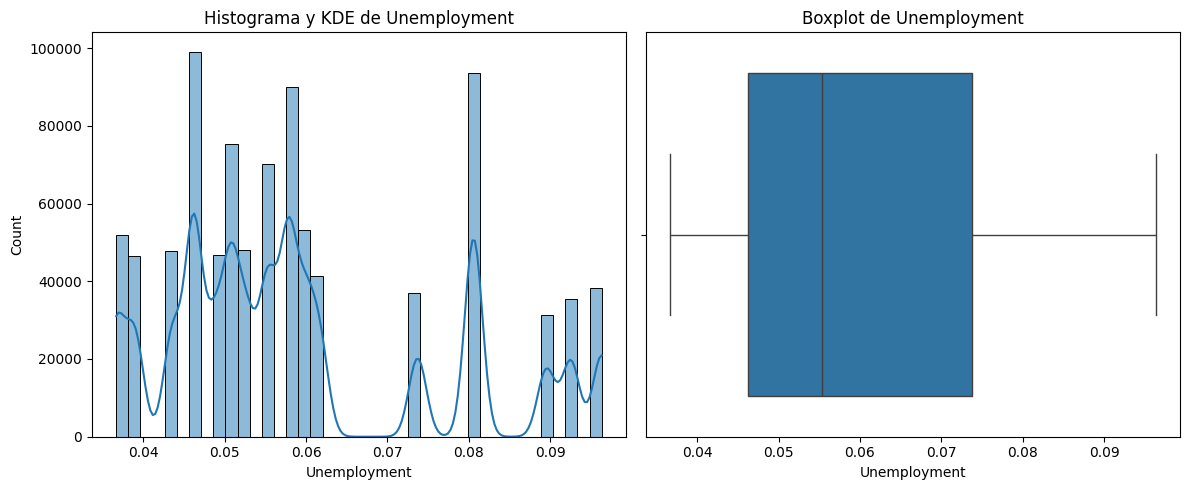

In [268]:
plot_combined_graphs(df_total, ["Unemployment"], whisker_width=2, bins = 40)

<Axes: xlabel='Recorded Year'>

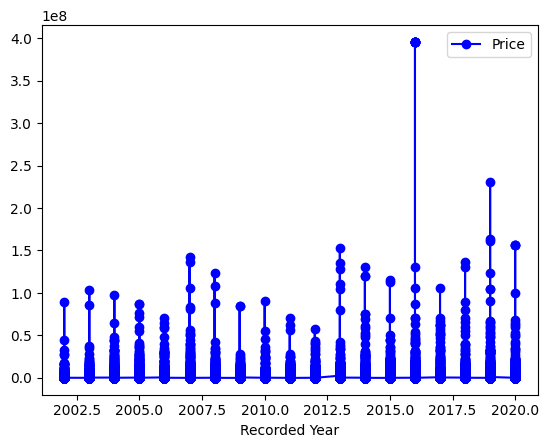

In [269]:
df_total.plot(x='Recorded Year', y='Price', marker='o', linestyle='-', color='b')

In [270]:
df_yearly_sales=pd.DataFrame(df_total.groupby("Recorded Year")["Date Recorded"].count())
df_yearly_price=pd.DataFrame(df_total.groupby("Recorded Year")["Price"].mean())
df_yearly_intrate=df_total.groupby("Recorded Year")["Interest Rate"].mean().round(4)*100
df_yearly_inflation=df_total.groupby("Recorded Year")["Inflation"].mean().round(4)*100
df_yearly_unemployment=df_total.groupby("Recorded Year")["Unemployment"].mean().round(4)*100

In [271]:
df_yearly=pd.merge(pd.merge(pd.merge(pd.merge(df_yearly_sales,df_yearly_price,how="left", on="Recorded Year"),df_yearly_intrate,how="left",on="Recorded Year"),df_yearly_inflation,how="left",on="Recorded Year"),df_yearly_unemployment,how="left",on="Recorded Year")
df_yearly

,Date Recorded,Price,Interest Rate,Inflation,Unemployment
Recorded Year,,,,,
2002,57057,262697.075714,1.68,1.59,5.78
2003,53306,308855.460567,1.11,2.27,5.99
2004,70258,343082.324803,1.38,2.68,5.53
2005,75405,384843.902367,3.20,3.39,5.08
2006,54682,378946.477872,4.98,3.23,4.62
2007,44421,481126.243340,5.08,2.85,4.62
2008,32941,416257.897119,2.03,3.84,5.78
2009,35428,325944.696737,0.00,-0.36,9.25
2010,38249,356575.654265,0.00,1.64,9.63


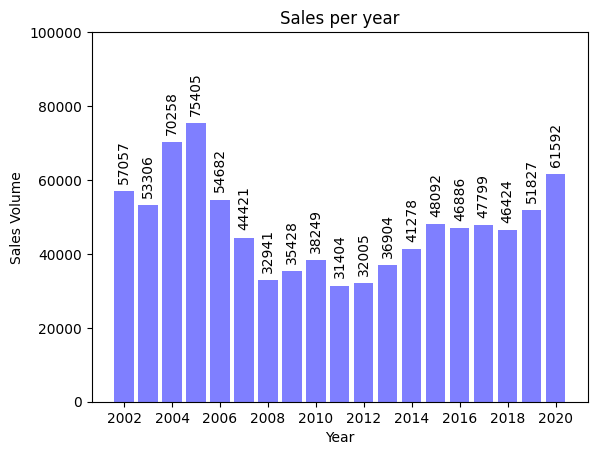

In [272]:
plt.figure()
bars=plt.bar(x= df_yearly.index, height= df_yearly["Date Recorded"], color = "b", alpha = 0.5)
plt.ylim([0,100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 2000, f"{yval}", ha="center", va="bottom", rotation="vertical")
#plt.text(float(df_yearly["Date Recorded"]), float(df_yearly["Date Recorded"]) + 50,f"{df_yearly["Date Recorded"]}", ha = "center")
plt.title("Sales per year")
plt.show()

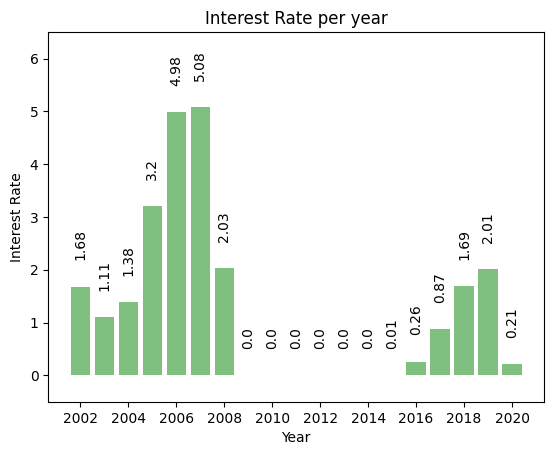

In [273]:
plt.figure()
bars=plt.bar(x= df_yearly.index, height= df_yearly["Interest Rate"], color = "g", alpha = 0.5)
plt.ylim([-0.5,6.5])
plt.ylabel("Interest Rate")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])
for bar in bars:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")
plt.title("Interest Rate per year")
plt.show()

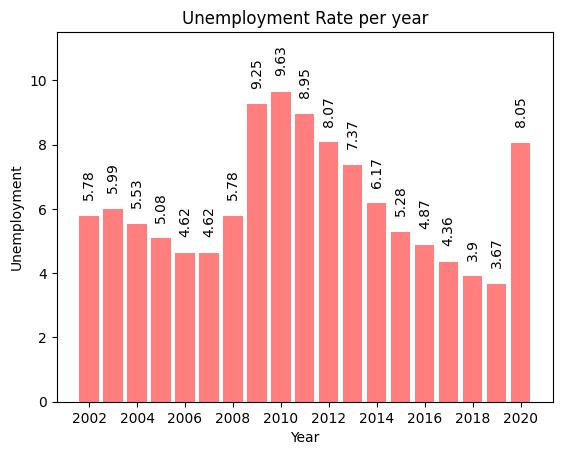

In [274]:
plt.figure()
bars=plt.bar(x= df_yearly.index, height= df_yearly["Unemployment"], color = "r", alpha = 0.5)
plt.ylim([0,11.5])
plt.ylabel("Unemployment")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])
for bar in bars:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")
plt.title("Unemployment Rate per year")
plt.show()

C:\Users\albab\AppData\Local\Temp\ipykernel_17044\701243521.py:18: MatplotlibDeprecationWarning: An artist whose label starts with an underscore was passed to legend(); such artists will no longer be ignored in the future.  To suppress this warning, explicitly filter out such artists, e.g. with `[art for art in artists if not art.get_label().startswith('_')]`.
  plt.legend(bars, labels, loc='upper left')


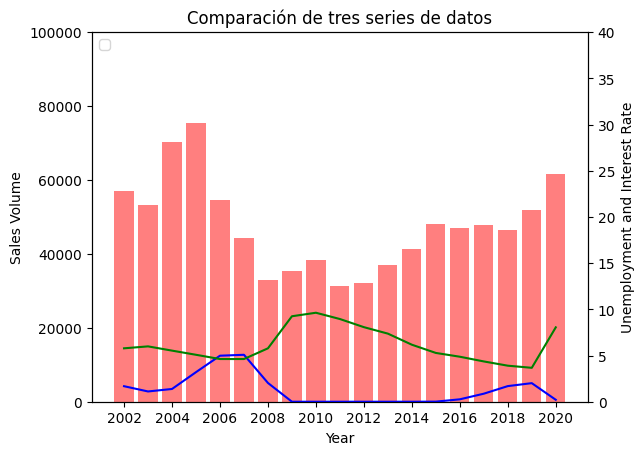

In [275]:
plt.figure()

bar1 = plt.bar(x=df_yearly.index, height=df_yearly["Date Recorded"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])

ax2 = plt.twinx()
lines2 = ax2.plot(df_yearly.index, df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

lines3 = ax2.plot(df_yearly.index, df_yearly["Unemployment"], color="g", label="Unemployment")



plt.legend(bars, labels, loc='upper left')

plt.title("Comparación de tres series de datos")
plt.show()

In [276]:
plt.figure()

bar1 = plt.bar(x=df_yearly.index, height=df_yearly["Date Recorded"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])

ax2 = plt.twinx()
line2 = ax2.plot(df_yearly.index, df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

line3 = ax2.plot(df_yearly.index, df_yearly["Unemployment"], color="g", label="Unemployment")

for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")

for line in (line2 + line3):
    yval = line.get_ydata().round(2)
    plt.text(line.get_xdata() + line.get_xdata()[1] / 2, yval + 0.5, f"{yval[0]}", ha="center", va="bottom", rotation="vertical")

plt.legend(loc='upper left')

plt.title("Comparación de tres series de datos")
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 640x480 with 2 Axes>

In [ ]:
plt.figure()

bar1 = plt.bar(x=df_yearly.index, height=df_yearly["Date Recorded"], color="r", alpha=0.5, label="Sales Volume")
plt.ylim([0, 100000])
plt.ylabel("Sales Volume")
plt.xlabel("Year")
plt.xticks(df_yearly.index[::2])

ax2 = plt.twinx()
line2 = ax2.plot(df_yearly.index, df_yearly["Interest Rate"], color="b", label="Interest Rate")
plt.ylim([0, 40])
ax2.set_ylabel("Unemployment and Interest Rate")

line3 = ax2.plot(df_yearly.index, df_yearly["Unemployment"], color="g", label="Unemployment")

for bar in bar1:
    yval = bar.get_height().round(2)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")

for line in (line2 + line3):
    yval = line.get_ydata()[0].round(2)
    plt.text(line.get_xdata() + line.get_xdata()[1] / 2, yval + 0.5, f"{yval}", ha="center", va="bottom", rotation="vertical")

plt.legend(loc='upper left')

plt.title("Comparación de tres series de datos")
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 640x480 with 2 Axes>